# Jurnal Modul 3

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [138]:
def show_image2(w, h, citra1, citra2, caption1, caption2):
    plt.figure(figsize=(w,h))
    plt.subplot(1,2,1)
    plt.title(label= caption1, fontsize = 10)
    plt.imshow(citra1, cmap='gray')
    plt.subplot(1,2,2)
    plt.title(label= caption2, fontsize = 10)
    plt.imshow(citra2, cmap='gray')

def show_image4(w, h, citra1, citra2, citra3, citra4, caption1, caption2, caption3, caption4):
    plt.figure(figsize=(w, h))
    plt.subplot(2,2,1)
    plt.title(label= caption1, fontsize = 10)
    plt.imshow(citra1, cmap='gray')
    plt.subplot(2,2,2)
    plt.title(label= caption2, fontsize = 10)
    plt.imshow(citra2, cmap='gray')
    plt.subplot(2,2,3)
    plt.title(label= caption3, fontsize = 10)
    plt.imshow(citra3, cmap='gray')
    plt.subplot(2,2,4)
    plt.title(label= caption4, fontsize = 10)
    plt.imshow(citra4, cmap='gray')

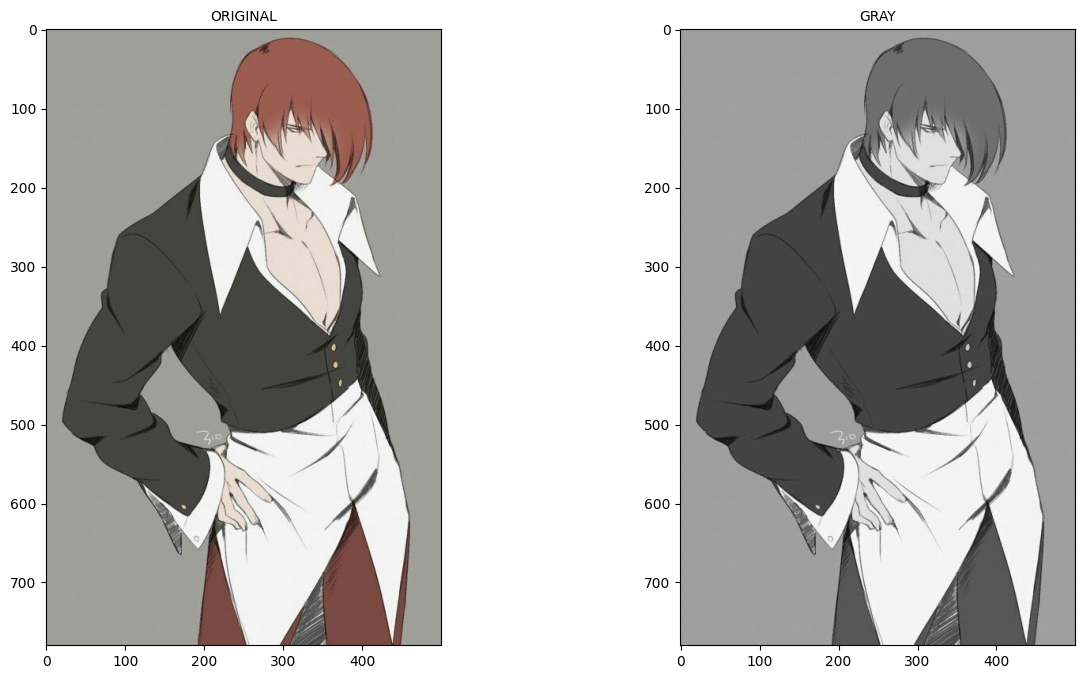

In [139]:
image_plt = plt.imread('IoriYagami.jpg')
image = cv2.imread('IoriYagami.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


show_image2(15, 8, image_plt, image, "ORIGINAL", "GRAY")

In [140]:
LPF = np.array([0.5, 0.5])
HPF = np.array([-0.5, -0.5])

In [141]:
image = np.array(image [:,:])

In [142]:
def padding (matriks, jmlh_pad):
    padd = np.pad(matriks, [0, jmlh_pad], mode = "constant")
    return padd

In [143]:
def filter_1 (matriks, filter, citra):
    baris, kolom = citra.shape
    konvol1 = np.zeros((baris, kolom))
    for i in range (len(konvol1)):
        for j in range (len(konvol1[i])):
            for k in range (len(filter)):
                konvol1[i][j] += (matriks[i][j+k] * filter[k])
    return konvol1

In [144]:
def filter_2 (matriks, filter, citra):
    baris, kolom = citra.shape
    konvol1 = np.zeros((baris, kolom))
    for i in range (len(konvol1)):
        for j in range (len(konvol1[i])):
            for k in range (len(filter)):
                konvol1[i][j] += (matriks[i+k][j] * filter[k])
    return konvol1

In [145]:
def downsampling_1 (kernel):
    baris, kolom = kernel.shape
    baris = int(baris)
    kolom = int(kolom/2)
    kernel1 = np.zeros((baris, kolom))
    for i in range (baris):
        index = 0
        for j in range (kolom):
            kernel1[i][j] = kernel[i][index]
            index = index + 2
    return kernel1

In [146]:
def downsampling_2 (kernel):
    baris, kolom = kernel.shape
    baris = int(baris/2)
    kolom = int(kolom)
    kernel1 = np.zeros((baris, kolom))
    index = 0
    for i in range (baris):
        for j in range (kolom):
            kernel1[i][j] = kernel[index][j]
        index = index + 2
    return kernel1

In [147]:
def level_1 (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis=1)
    baris_2 = np.concatenate ((LH, HH), axis=1)
    return np.concatenate ((baris_1, baris_2), axis = 0)

In [148]:
pad = padding (image, 7)
konvolusi = filter_1(pad, LPF, image)
downsampling = downsampling_1(konvolusi)
padd = padding(downsampling, 7)
konvolusi2 = filter_2(padd, LPF, downsampling)
approx = downsampling_2 (konvolusi2)

pad = padding (image, 7)
konvolusi = filter_1(pad, LPF, image)
downsampling = downsampling_1(konvolusi)
padd = padding(downsampling, 7)
konvolusi2 = filter_2(padd, HPF, downsampling)
horizontal = downsampling_2 (konvolusi2)

pad = padding (image, 7)
konvolusi = filter_1(pad, HPF, image)
downsampling = downsampling_1(konvolusi)
padd = padding(downsampling, 7)
konvolusi2 = filter_2(padd, LPF, downsampling)
vertical = downsampling_2 (konvolusi2)

pad = padding (image, 7)
konvolusi = filter_1(pad, HPF, image)
downsampling = downsampling_1(konvolusi)
padd = padding(downsampling, 7)
konvolusi2 = filter_2(padd, HPF, downsampling)
diagonal = downsampling_2 (konvolusi2)

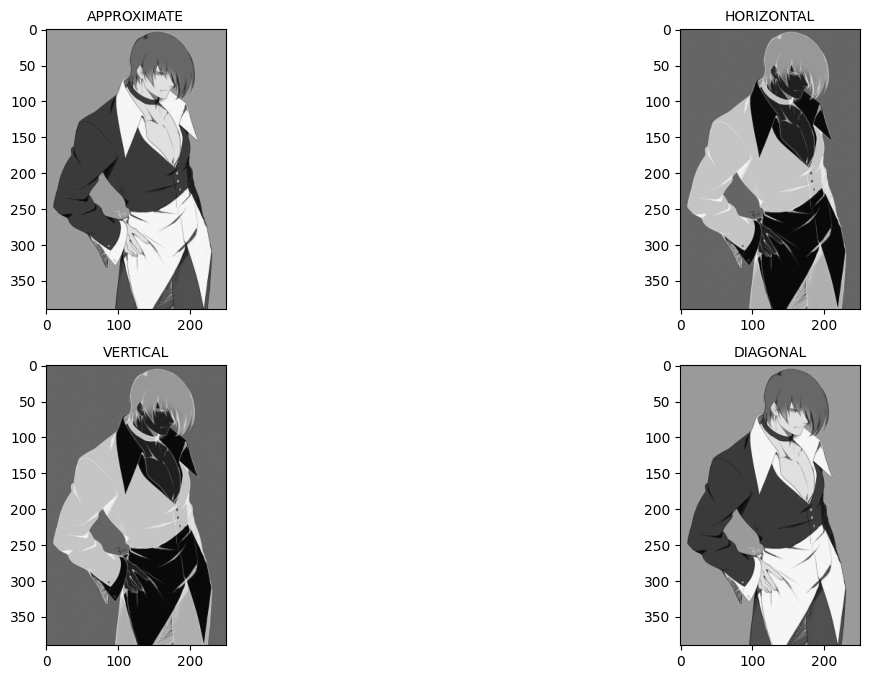

In [149]:
show_image4 (15, 8, approx, horizontal, vertical, diagonal, "APPROXIMATE", "HORIZONTAL", "VERTICAL", "DIAGONAL")

(-0.5, 7048.5, 2735.5, -0.5)

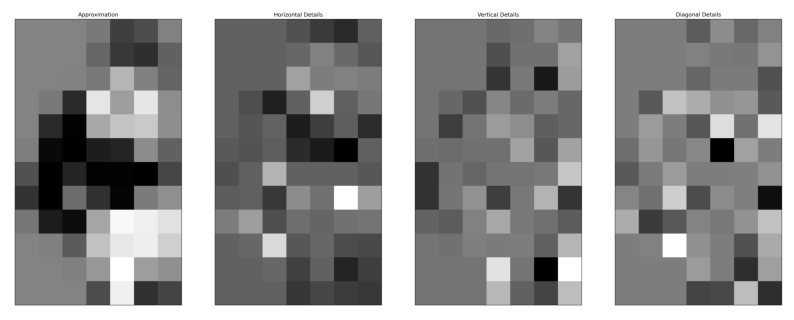

In [150]:
imgDec = plt.imread('Assets/___dekomposisi.png')

plt.figure(figsize=(10, 10))
plt.imshow(imgDec, cmap='gray')
plt.axis("off")